<a href="https://colab.research.google.com/github/abhishekyadav2597/MTP/blob/master/MTP_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MTP Project

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Garden Reach

### Exploration

In [0]:
data=["2015","2016","2017","2018","2019"]
path="/content/drive/My Drive/GardenReach_"
df_2015=pd.read_csv(path+"2015.csv",names=["Station Name","Observation Time","Tide Height Raadar","Tide Height Pressure","Tide Height Encoder"])
df_2016=pd.read_csv(path+"2016.csv",names=["Station Name","Observation Time","Tide Height Raadar","Tide Height Pressure","Tide Height Encoder"])
df_2017=pd.read_csv(path+"2017.csv",names=["Station Name","Observation Time","Tide Height Raadar","Tide Height Pressure","Tide Height Encoder"])
df_2018=pd.read_csv(path+"2018.csv",names=["Station Name","Observation Time","Tide Height Raadar","Tide Height Pressure","Tide Height Encoder"])
df_2019=pd.read_csv(path+"2019.csv",names=["Station Name","Observation Time","Tide Height Raadar","Tide Height Pressure","Tide Height Encoder"])

In [0]:
df_2015["Observation Time"]=pd.to_datetime(df_2015["Observation Time"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f29600320>]],
      dtype=object)

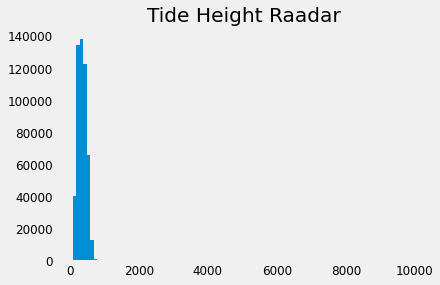

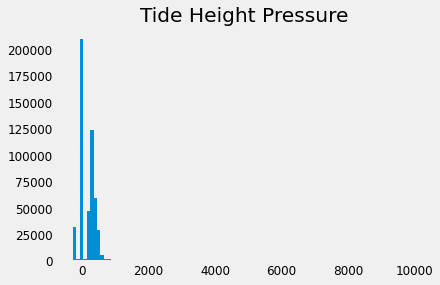

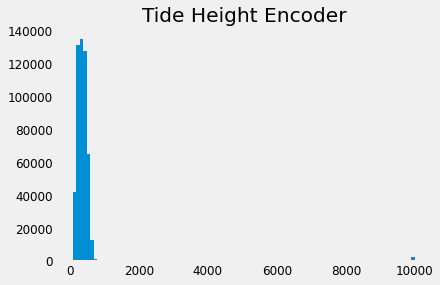

In [0]:
df_2015.hist(column='Tide Height Raadar', bins=100,grid=False)
df_2015.hist(column='Tide Height Pressure', bins=100,grid=False)
df_2015.hist(column='Tide Height Encoder', bins=100,grid=False)

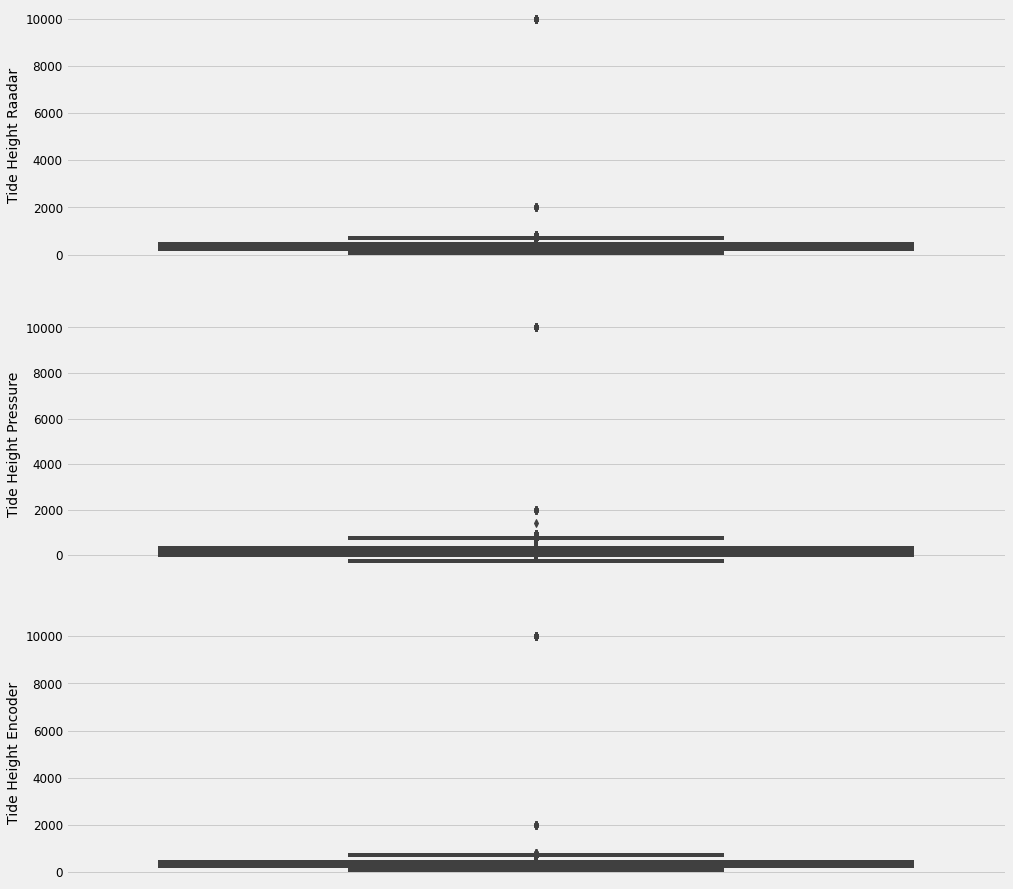

In [0]:
f, axes = plt.subplots(3, 1,figsize=(15,15))
sns.boxplot(x=df_2015["Tide Height Raadar"],orient='v',ax=axes[0])
sns.boxplot(x=df_2015["Tide Height Pressure"],orient='v',ax=axes[1])
sns.boxplot(x=df_2015["Tide Height Encoder"],orient='v',ax=axes[2])

In [0]:
Threshold=1500
df_2015['Tide Height Raadar'] = df_2015['Tide Height Raadar'].mask(df_2015['Tide Height Raadar'] > 1500)
df_2015['Tide Height Pressure'] = df_2015['Tide Height Pressure'].mask(df_2015['Tide Height Pressure'] > 1500)
df_2015['Tide Height Encoder'] = df_2015['Tide Height Encoder'].mask(df_2015['Tide Height Encoder'] > 1500)

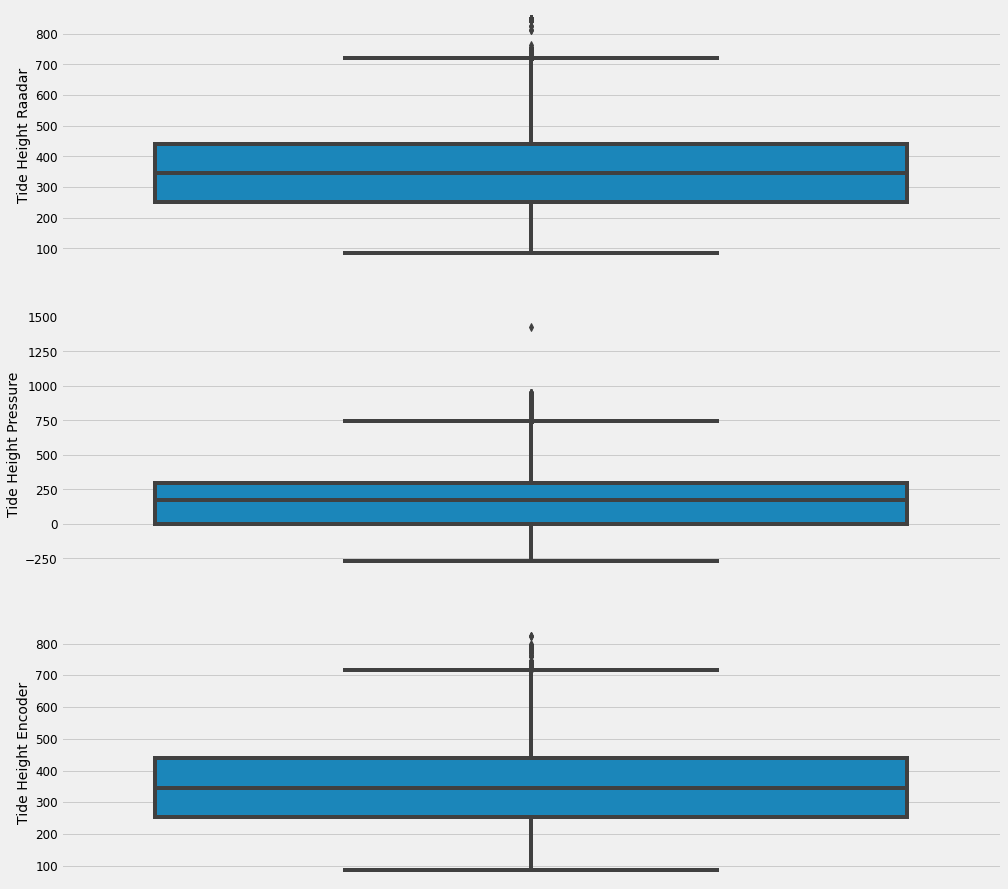

In [0]:
f, axes = plt.subplots(3, 1,figsize=(15,15))
sns.boxplot(x=df_2015["Tide Height Raadar"],orient='v',ax=axes[0])
sns.boxplot(x=df_2015["Tide Height Pressure"],orient='v',ax=axes[1])
sns.boxplot(x=df_2015["Tide Height Encoder"],orient='v',ax=axes[2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f23025a58>]],
      dtype=object)

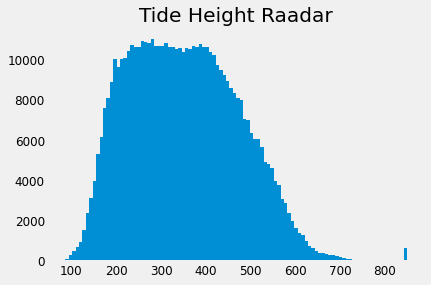

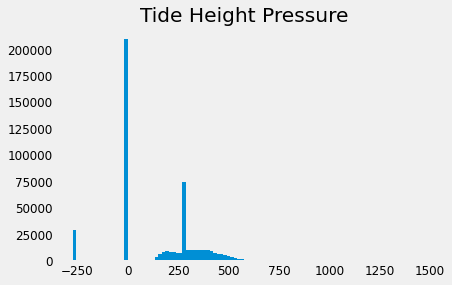

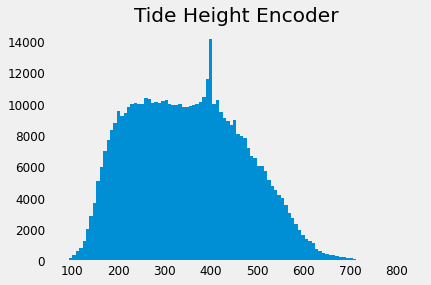

In [0]:
df_2015.hist(column='Tide Height Raadar', bins=100,grid=False)
df_2015.hist(column='Tide Height Pressure', bins=100,grid=False)
df_2015.hist(column='Tide Height Encoder', bins=100,grid=False)

### Predicting

In [0]:
df_2015.head()

,Station Name,Observation Time,Tide Height Raadar,Tide Height Pressure,Tide Height Encoder
0,GardenReach,2015-01-01 00:00:00,207.3,209.7,207.1
1,GardenReach,2015-01-01 00:01:00,207.5,209.9,207.3
2,GardenReach,2015-01-01 00:02:00,206.6,208.5,206.2
3,GardenReach,2015-01-01 00:03:00,206.6,208.7,206.3
4,GardenReach,2015-01-01 00:04:00,206.8,209.1,206.7


In [0]:
data_set=df_2018[['Observation Time','Tide Height Raadar','Tide Height Pressure','Tide Height Encoder']]

In [0]:
data_set['Observation Time']=pd.to_datetime(data_set['Observation Time'])
data_set = data_set.sort_values('Observation Time')
data_set = data_set.groupby('Observation Time')['Tide Height Raadar','Tide Height Pressure','Tide Height Encoder'].sum().reset_index()
data_set = data_set.set_index('Observation Time')

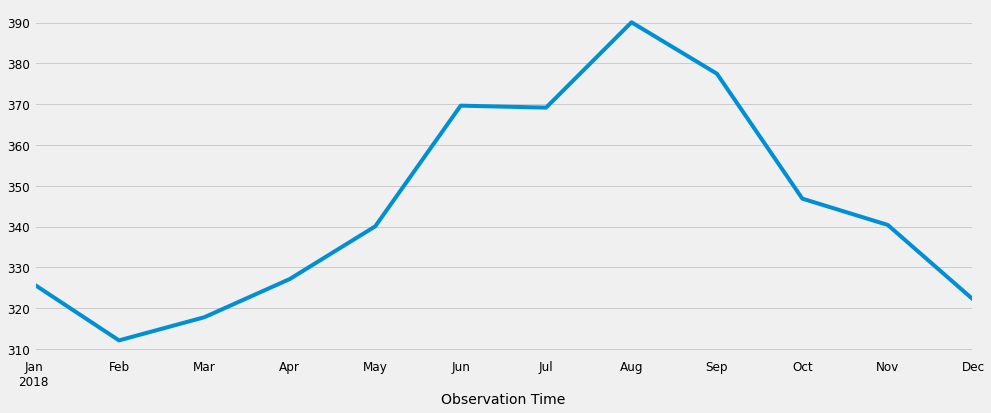

In [0]:
#Weekly mean of data points
y = data_set['Tide Height Raadar'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

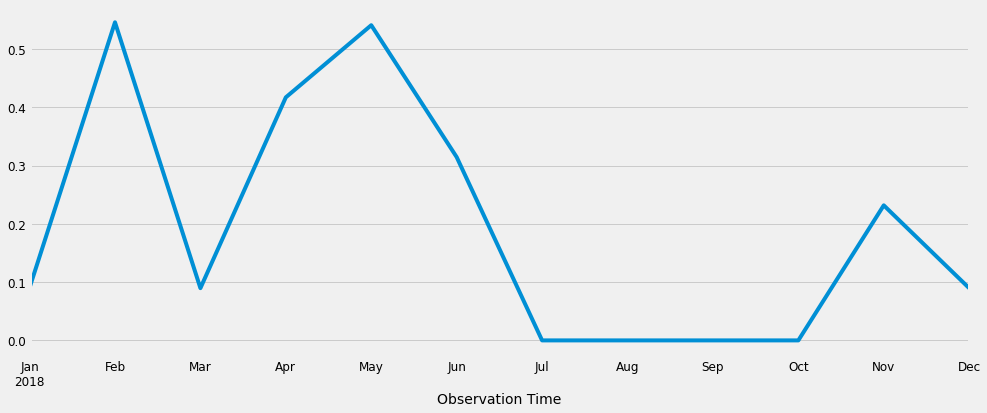

In [0]:
#Weekly mean of data points
y = data_set['Tide Height Pressure'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

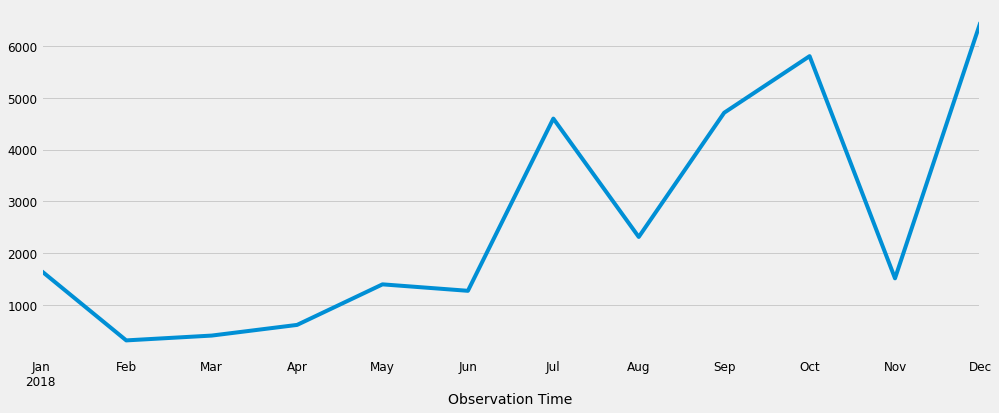

In [0]:
#Weekly mean of data points
y = data_set['Tide Height Encoder'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

### Merging Dataset

In [0]:
data_set=df_2015[['Observation Time','Tide Height Raadar']]

In [0]:
data_temp=data_set.append(df_2016[['Observation Time','Tide Height Raadar']])

In [0]:
data_temp=data_temp.append(df_2017[['Observation Time','Tide Height Raadar']])

In [0]:
data_temp=data_temp.append(df_2018[['Observation Time','Tide Height Raadar']])

In [0]:
data_set=data_temp

In [0]:
data_set['Observation Time']=pd.to_datetime(data_set['Observation Time'])
data_set = data_set.sort_values('Observation Time')
data_set = data_set.groupby('Observation Time')['Tide Height Raadar'].sum().reset_index()
data_set = data_set.set_index('Observation Time')

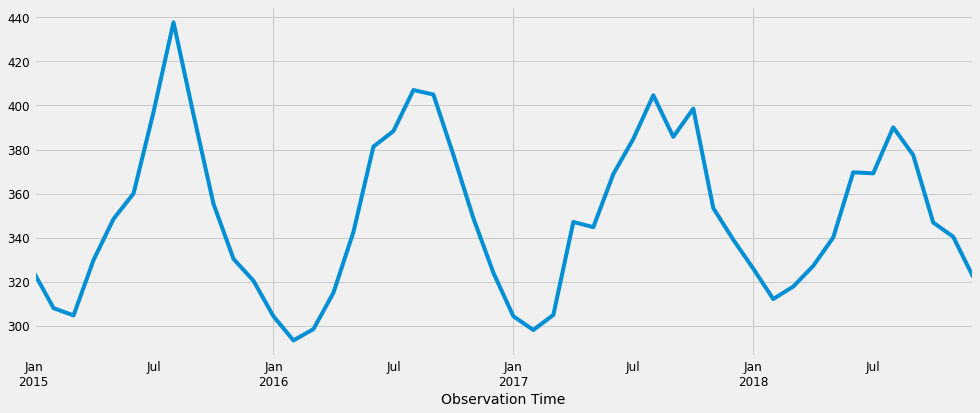

In [0]:
#Weekly mean of data points
y = data_set['Tide Height Raadar'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

In [0]:
data_set['Tide Height Raadar'] = data_set['Tide Height Raadar'].mask(data_set['Tide Height Raadar'] > 1500)

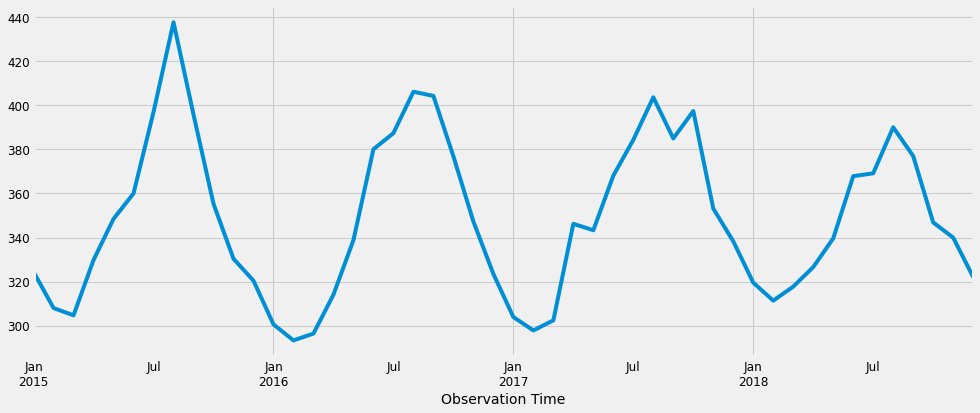

In [0]:
#Weekly mean of data points
y = data_set['Tide Height Raadar'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

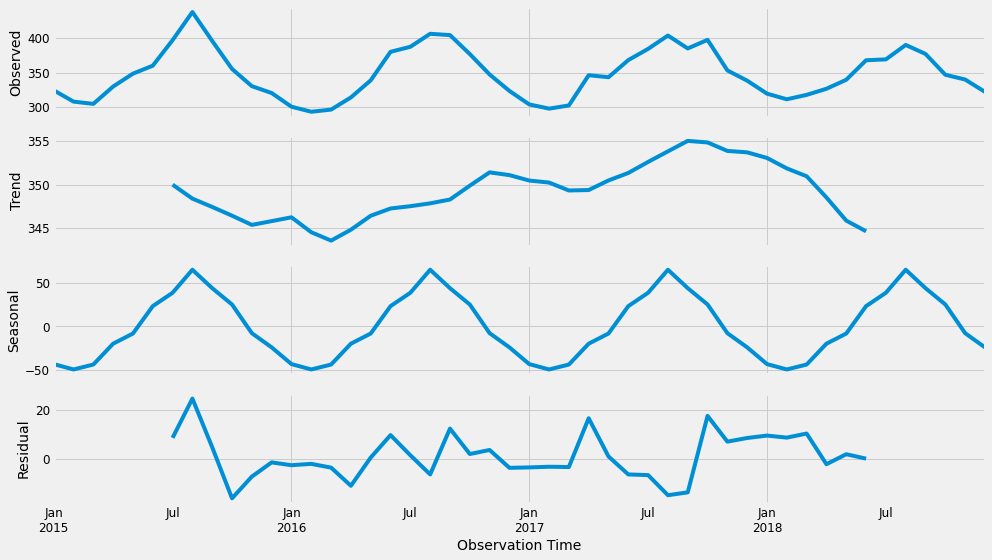

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
#AIC estimates the quality of each model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:686.2795641797875
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1390.3172332525673
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:298.6539983884446
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:308.8860563291864
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1339.5509995982195
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:205.34062230362633
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:617.3279606984617
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2580.44270658752
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:289.19679782031307
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:311.74292746258027
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2529.0013506786063
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:202.1572043806441
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:419.7855415597729
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1568.439160320024
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:301.523025442518
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:297.73766448785597
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1294.535862360155
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:196.09124637443546
ARIM

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5912      0.511      1.156      0.248      -0.411       1.594
ma.L1         -1.0000   1468.249     -0.001      0.999   -2878.715    2876.715
ar.S.L12      -0.5783      0.178     -3.249      0.001      -0.927      -0.229
sigma2       202.4559   2.97e+05      0.001      0.999   -5.83e+05    5.83e+05


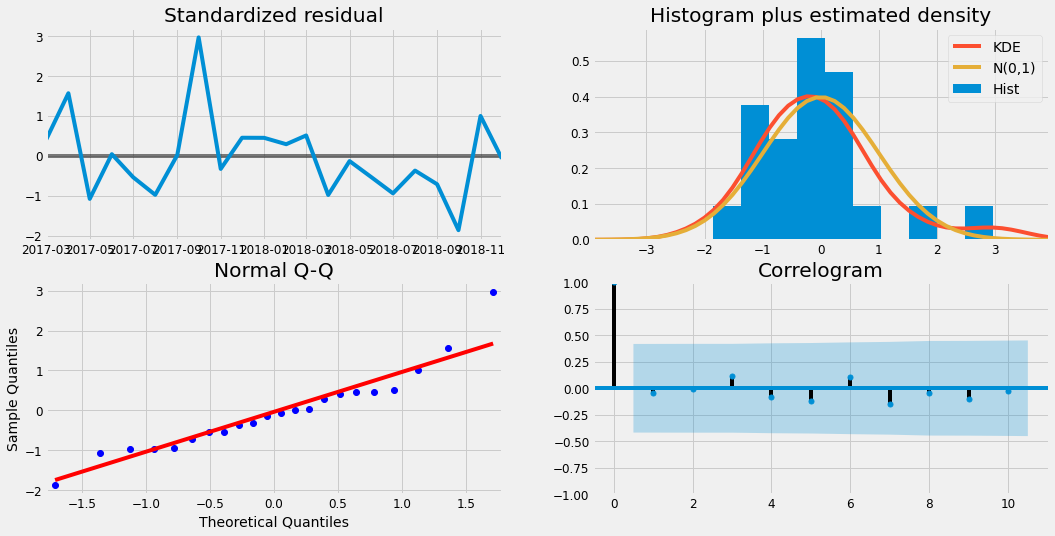

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

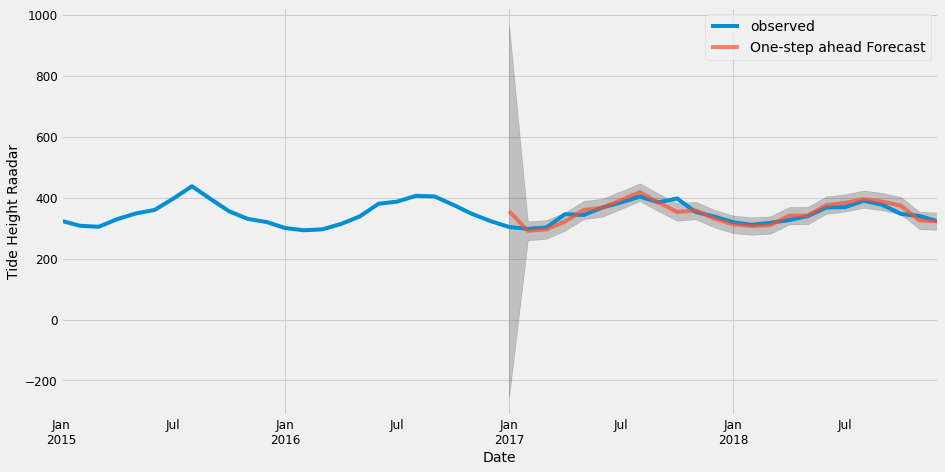

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Tide Height Raadar')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 315.94


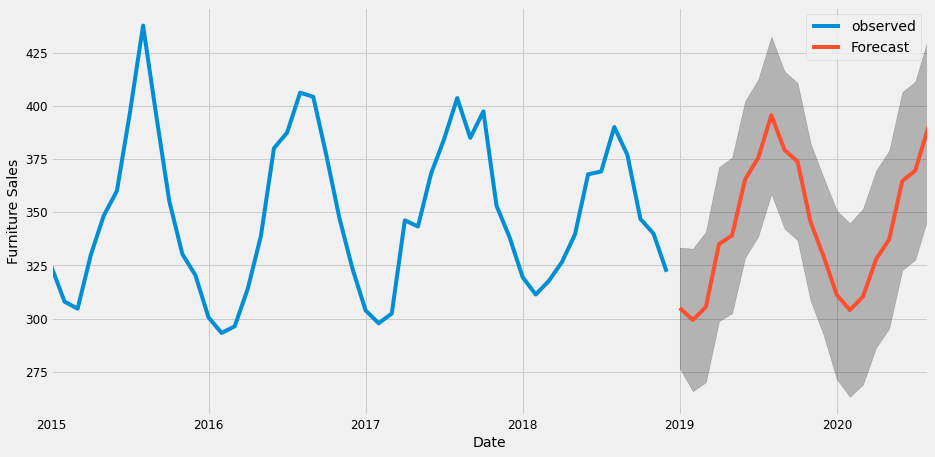

In [0]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Site C

In [0]:
df_50=pd.read_csv("/content/drive/My Drive/SIte_C_Sunil_50ft_23Nov2018_WL.csv",skiprows=[i for i in range(11)])
df_370=pd.read_csv("/content/drive/My Drive/SIte_C_Sunil_370ft_23Nov2018_WL.csv",skiprows=[i for i in range(11)])

In [0]:
# converting Date Time formats 
df_50["Observation Time"]=pd.to_datetime(df_50["Date"]+" "+df_50["Time"])
df_370["Observation Time"]=pd.to_datetime(df_370["Date"]+" "+df_370["Time"])
df_370.head()

,Date,Time,ms,LEVEL,TEMPERATURE,Observation Time
0,04/02/17,18:48:42,0,15.8322,27.019,2017-04-02 18:48:42
1,04/02/17,19:18:42,0,15.8348,27.021,2017-04-02 19:18:42
2,04/02/17,19:48:42,0,15.8414,27.030,2017-04-02 19:48:42
3,04/02/17,20:18:42,0,15.8494,27.014,2017-04-02 20:18:42
4,04/02/17,20:48:42,0,15.8566,27.018,2017-04-02 20:48:42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f23216748>]],
      dtype=object)

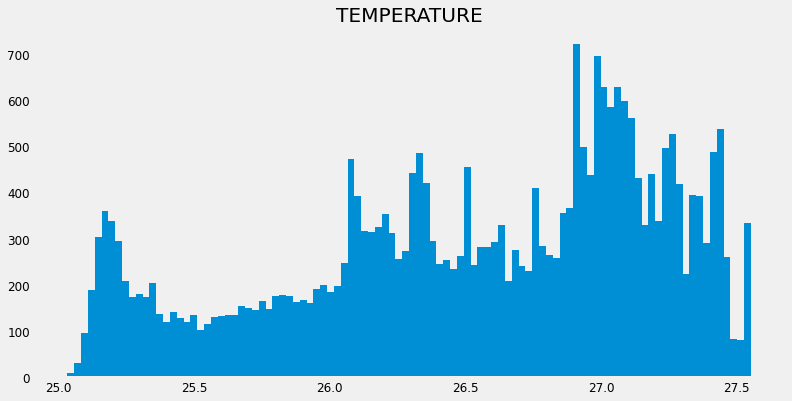

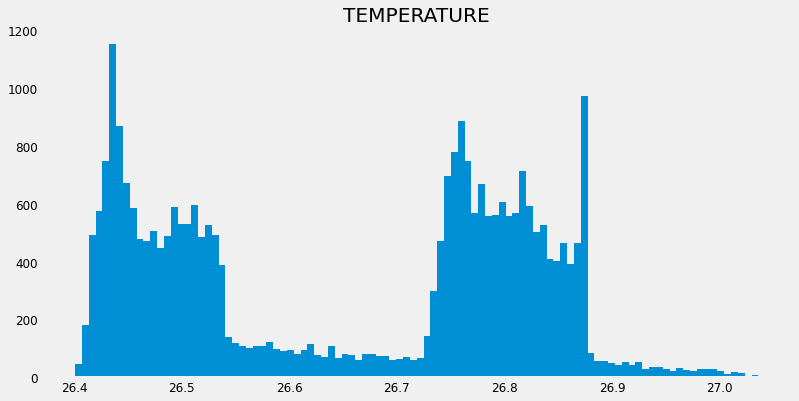

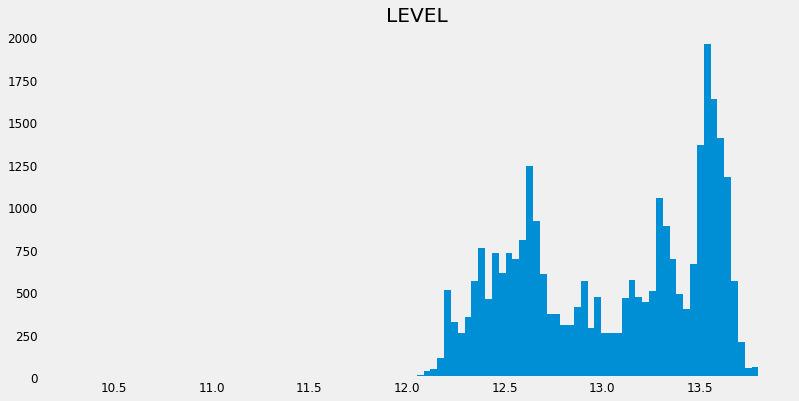

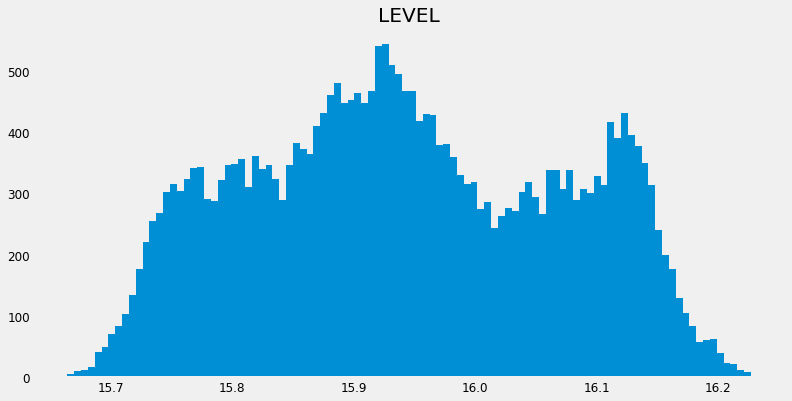

In [0]:
df_50.hist(column='TEMPERATURE',bins=100,grid=False,figsize=(12,6))
df_370.hist(column='TEMPERATURE',bins=100,grid=False,figsize=(12,6))
df_50.hist(column='LEVEL',bins=100,grid=False,figsize=(12,6))
df_370.hist(column='LEVEL',bins=100,grid=False,figsize=(12,6))

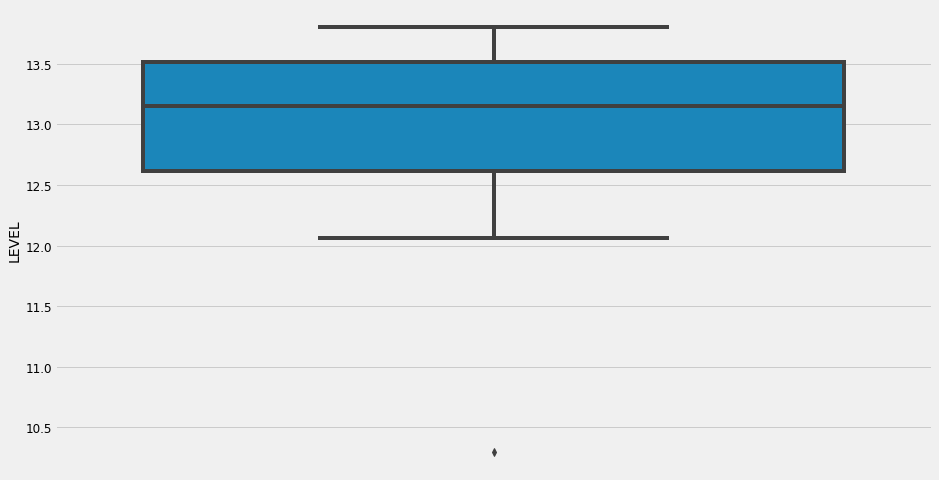

In [0]:
sns.boxplot(x=df_50["LEVEL"],orient='v')

In [0]:
#Only one value less than 12
df_50=df_50[df_50['LEVEL']>12]

### Predicting

In [0]:
df_50.head()

,Date,Time,ms,LEVEL,TEMPERATURE,Observation Time
0,04/02/17,18:48:54,0,12.6421,26.076,2017-04-02 18:48:54
1,04/02/17,19:18:54,0,12.6459,26.098,2017-04-02 19:18:54
2,04/02/17,19:48:54,0,12.6499,26.096,2017-04-02 19:48:54
3,04/02/17,20:18:54,0,12.6542,26.112,2017-04-02 20:18:54
4,04/02/17,20:48:54,0,12.6582,26.083,2017-04-02 20:48:54


In [0]:
print("Start Time: "+str(min(df_50['Observation Time'])))
print("End Time: "+str(max(df_50['Observation Time'])))

Start Time: 2017-04-02 18:48:54
End Time: 2018-11-23 08:18:54


In [0]:
data_set_shallow=df_50[['Observation Time','LEVEL','TEMPERATURE']]
data_set_deep=df_370[['Observation Time','LEVEL','TEMPERATURE']]

In [0]:
data_set_shallow = data_set_shallow.sort_values('Observation Time')
data_set_shallow = data_set_shallow.groupby('Observation Time')['LEVEL','TEMPERATURE'].sum().reset_index()
data_set_shallow = data_set_shallow.set_index('Observation Time')

data_set_deep = data_set_deep.sort_values('Observation Time')
data_set_deep = data_set_deep.groupby('Observation Time')['LEVEL','TEMPERATURE'].sum().reset_index()
data_set_deep = data_set_deep.set_index('Observation Time')

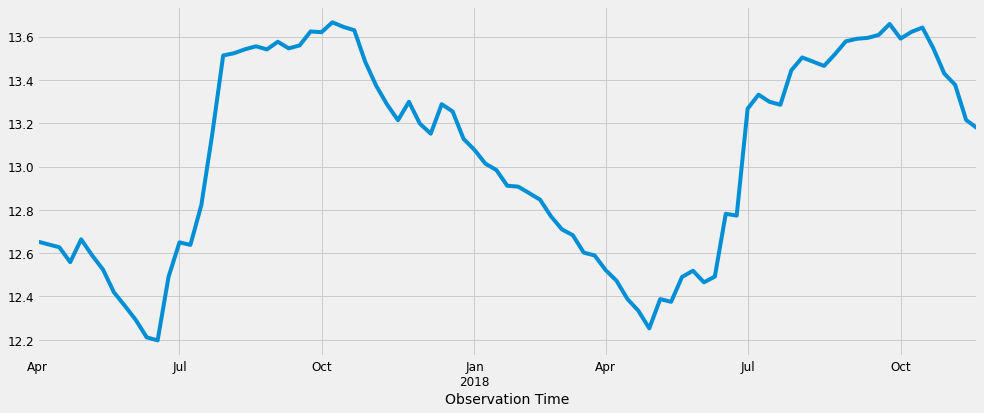

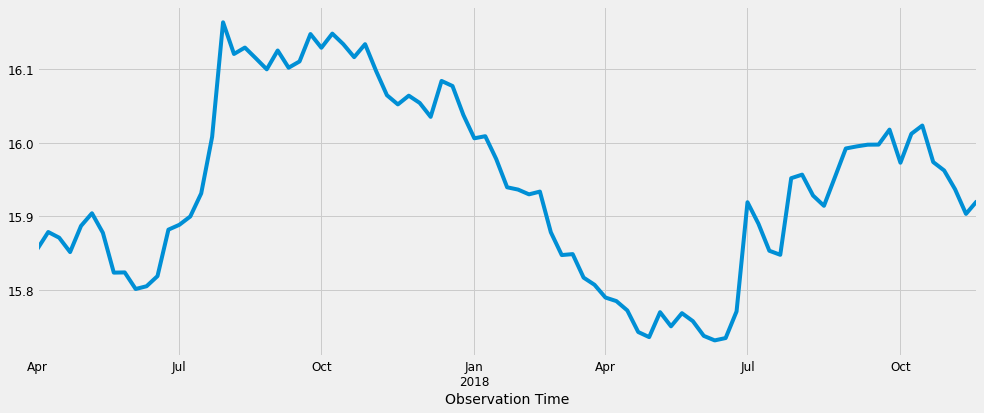

In [0]:
#Weekly mean of data points
y1 = data_set_shallow['LEVEL'].resample('W').mean()
y1.plot(figsize=(15, 6))
plt.show()
y1.to_csv("Ground_water_C50.csv")
y2 = data_set_deep['LEVEL'].resample('W').mean()
y2.plot(figsize=(15, 6))
y2.to_csv("Ground_water_C370.csv")
plt.show()

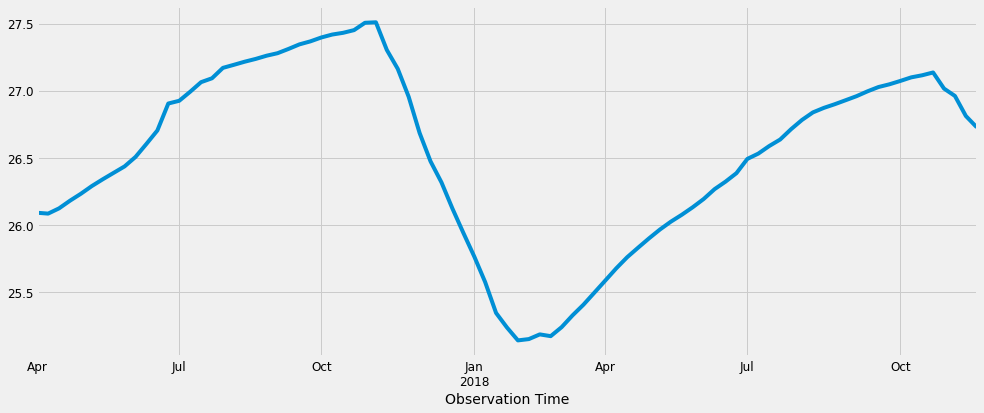

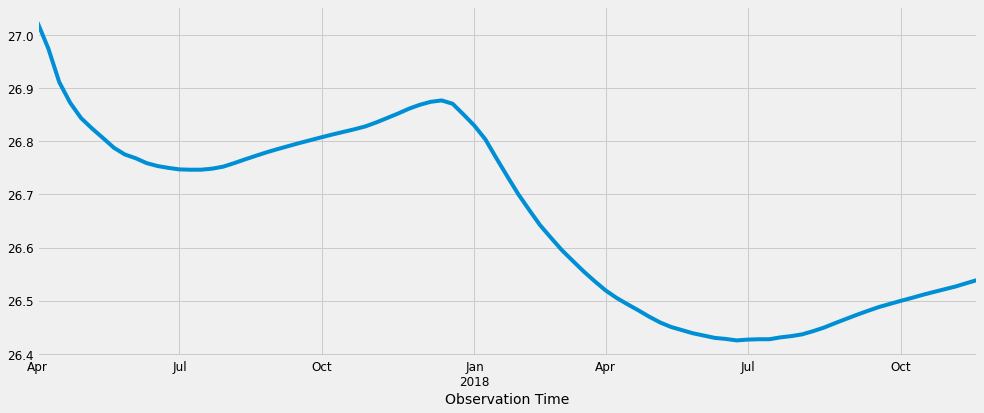

In [0]:
#Weekly mean of data points
y = data_set_shallow['TEMPERATURE'].resample('W').mean()
y.plot(figsize=(15, 6))
plt.show()

y = data_set_deep['TEMPERATURE'].resample('W').mean()
y.plot(figsize=(15, 6))
plt.show()

In [0]:
data_set_shallow.head()

,LEVEL,TEMPERATURE
Observation Time,,
2017-04-02 18:48:54,12.6421,26.076
2017-04-02 19:18:54,12.6459,26.098
2017-04-02 19:48:54,12.6499,26.096
2017-04-02 20:18:54,12.6542,26.112
2017-04-02 20:48:54,12.6582,26.083


# Data New

In [0]:
df=pd.read_excel("/content/drive/My Drive/Data_abhishek.xlsx",skiprows=[0])

In [4]:
df.head()

,Date,WL (m),Unnamed: 2,Unnamed: 3,Unnamed: 4,Date.1,WL (m).1
0,2018-01-01 00:18:54,0.948855,NaN,NaN,NaN,2018-01-01 00:18:42,2.018895
1,2018-01-01 00:48:54,0.950924,NaN,NaN,NaN,2018-01-01 00:48:42,2.019664
2,2018-01-01 01:18:54,0.951416,NaN,NaN,NaN,2018-01-01 01:18:42,2.021956
3,2018-01-01 01:48:54,0.951727,NaN,NaN,NaN,2018-01-01 01:48:42,2.026067
4,2018-01-01 02:18:54,0.952967,NaN,NaN,NaN,2018-01-01 02:18:42,2.023707


In [0]:
df1=df[['Date', 'WL (m)']]
df2=df[['Date.1', 'WL (m).1']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8131cf2470>]],
      dtype=object)

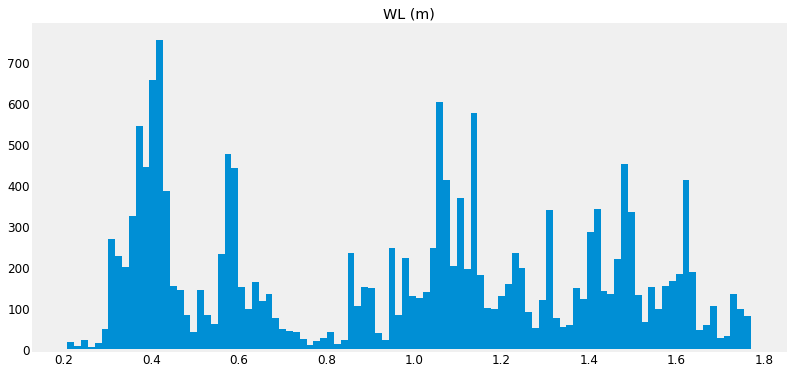

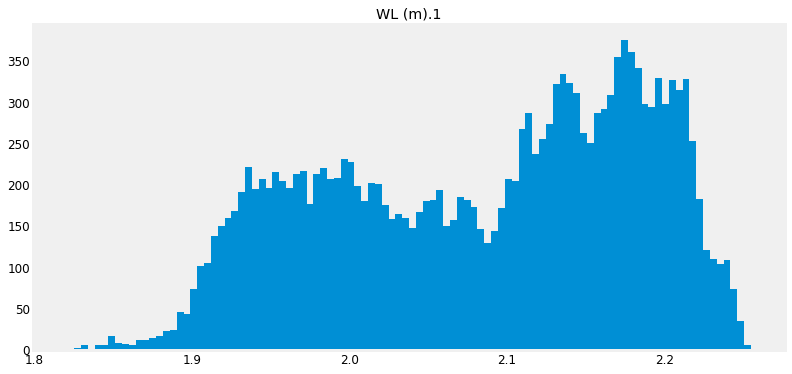

In [6]:
df1.hist(column='WL (m)',bins=100,grid=False,figsize=(12,6))
df2.hist(column='WL (m).1',bins=100,grid=False,figsize=(12,6))

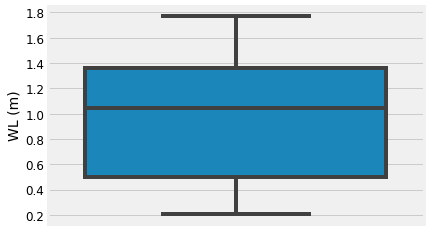

In [7]:
sns.boxplot(x=df1["WL (m)"],orient='v')

In [0]:
df_sub=df1[:100]

In [0]:
df_sub['Date']=pd.to_datetime(df_sub['Date'])
df_sub=df_sub.set_index('Date')

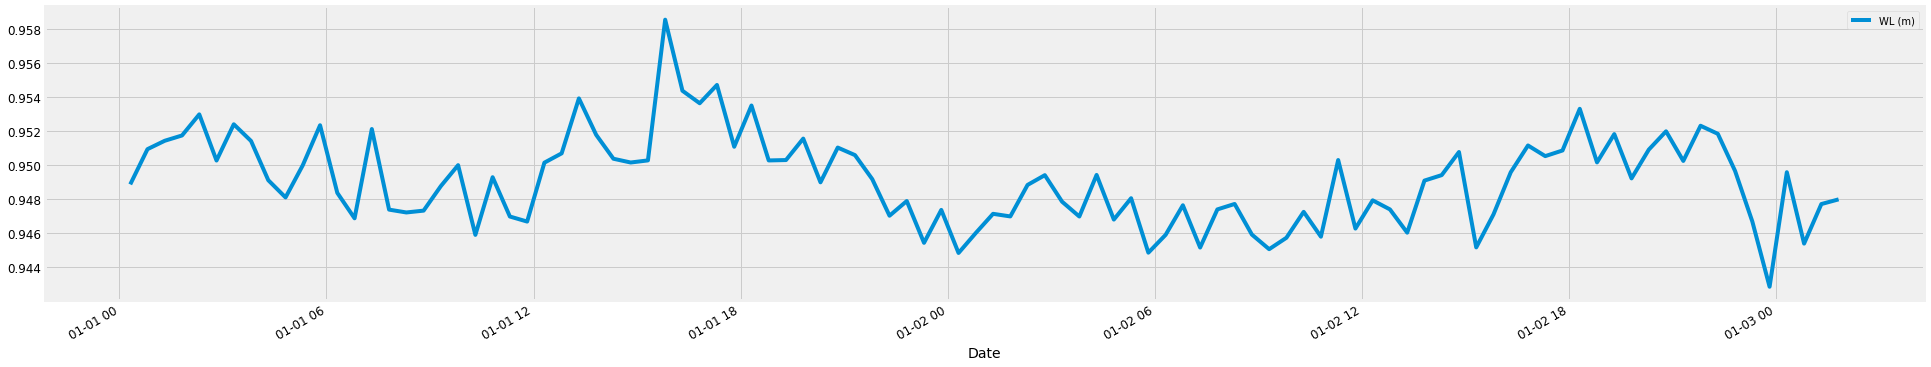

In [33]:
df_sub.plot(figsize=(30, 6))

### Predicting

In [8]:
df1.head()

,Date,WL (m)
0,2018-01-01 00:18:54,0.948855
1,2018-01-01 00:48:54,0.950924
2,2018-01-01 01:18:54,0.951416
3,2018-01-01 01:48:54,0.951727
4,2018-01-01 02:18:54,0.952967


In [9]:
print("Start Time: "+str(min(df1['Date'])))
print("End Time: "+str(max(df1['Date'])))

Start Time: 2018-01-01 00:18:54
End Time: 2018-12-31 23:48:54


In [0]:
data_set_shallow=df1[['Date','WL (m)']]
data_set_deep=df2[['Date.1','WL (m).1']]

In [0]:
data_set_shallow = data_set_shallow.sort_values('Date')
data_set_shallow = data_set_shallow.groupby('Date')['WL (m)'].sum().reset_index()
data_set_shallow = data_set_shallow.set_index('Date')

data_set_deep = data_set_deep.sort_values('Date.1')
data_set_deep = data_set_deep.groupby('Date.1')['WL (m).1'].sum().reset_index()
data_set_deep = data_set_deep.set_index('Date.1')

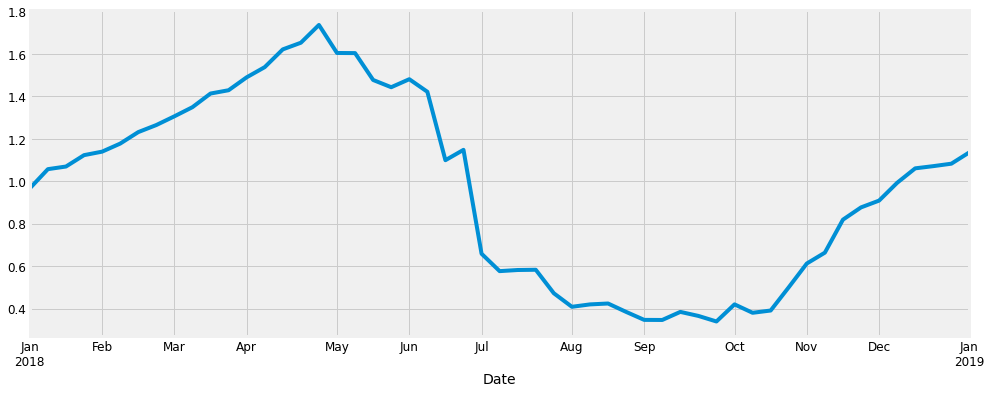

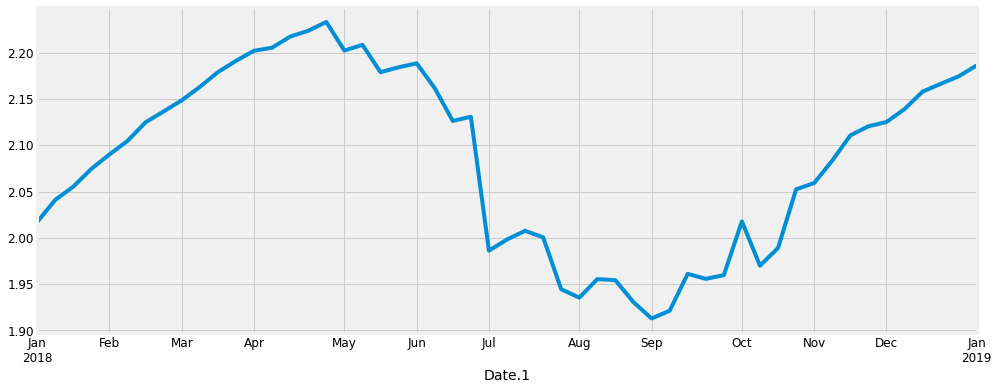

In [12]:
#Weekly mean of data points
y1 = data_set_shallow['WL (m)'].resample('W').mean()
y1.plot(figsize=(15, 6))
plt.show()

y2 = data_set_deep['WL (m).1'].resample('W').mean()
y2.plot(figsize=(15, 6))
plt.show()

# Plotting GW and SW

In [0]:
df_2018=pd.read_csv(path+"2018.csv",names=["Station Name","Observation Time","Tide Height Raadar","Tide Height Pressure","Tide Height Encoder"])
df_2018["Observat;ion Time"]=pd.to_datetime(df_2018["Observation Time"])

In [0]:
Threshold=1500
df_2018['Tide Height Raadar'] = df_2018['Tide Height Raadar'].mask(df_2018['Tide Height Raadar'] > 1500)
df_2018['Tide Height Raadar'] = df_2018['Tide Height Raadar'].mask(df_2018['Tide Height Raadar'] < -500)
df_2018['Tide Height Pressure'] = df_2018['Tide Height Pressure'].mask(df_2018['Tide Height Pressure'] > 1500)
df_2018['Tide Height Encoder'] = df_2018['Tide Height Encoder'].mask(df_2018['Tide Height Encoder'] > 1500)

In [0]:
data_set=df_2018[['Observation Time','Tide Height Raadar','Tide Height Pressure','Tide Height Encoder']]

In [0]:
data_set['Observation Time']=pd.to_datetime(data_set['Observation Time'])
data_set = data_set.sort_values('Observation Time')
data_set = data_set.groupby('Observation Time')['Tide Height Raadar','Tide Height Pressure','Tide Height Encoder'].sum().reset_index()

In [0]:
sum(data_set['Tide Height Raadar']>600)

5601

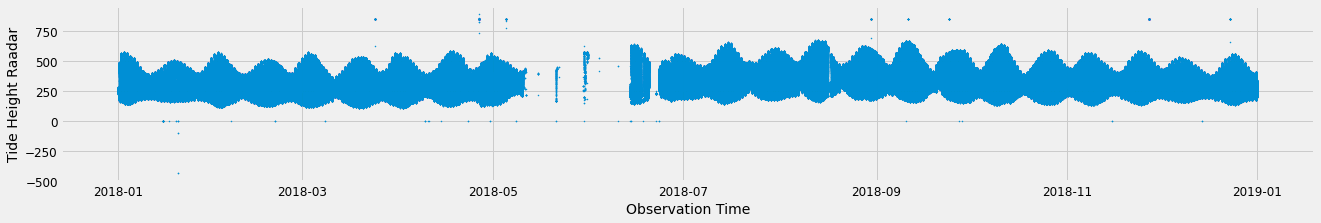

In [0]:
data_set.plot.scatter(x='Observation Time',y='Tide Height Raadar',s=1,figsize=(20,3))

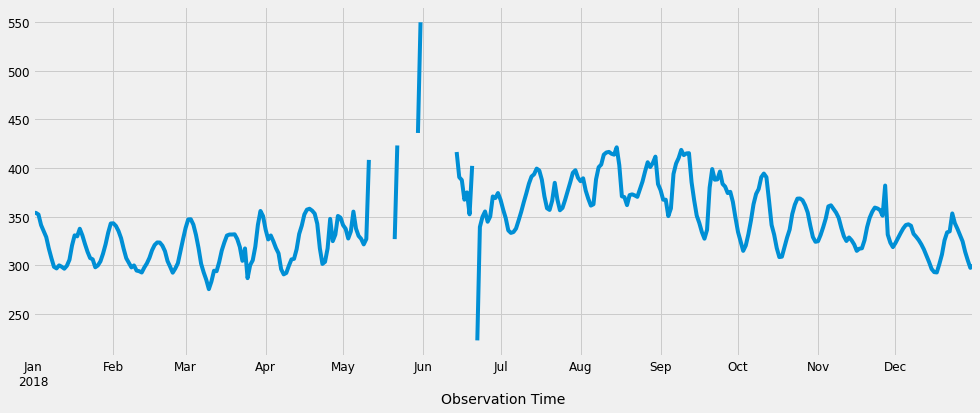

In [0]:
#Weekly mean of data points
y= data_set
y=y.set_index('Observation Time')
y = y['Tide Height Raadar'].resample('D').mean()
y.plot(figsize=(15, 6))
plt.show()

In [0]:
y.to_csv("Surface__waterGR_monthly.csv")

In [0]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_matplotlib').style, '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

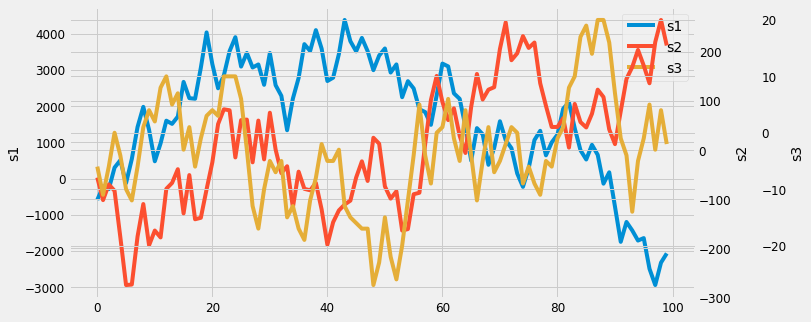

In [0]:
from random import randrange
data = pd.DataFrame(dict(
    s1=[randrange(-1000, 1000) for _ in range(100)],
    s2=[randrange(-100, 100) for _ in range(100)],
    s3=[randrange(-10, 10) for _ in range(100)],
))

plot_multi(data.cumsum(), figsize=(10, 5))

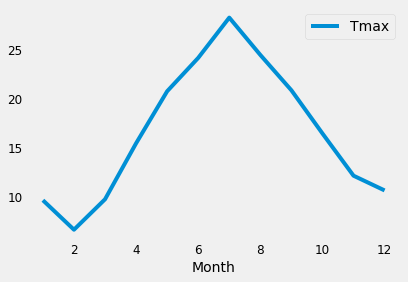

In [0]:
weather = pd.read_csv('https://raw.githubusercontent.com/alanjones2/dataviz/master/london2018.csv')
weather.plot(x='Month', y='Tmax')
plt.grid(b=None)
plt.show()

,Date,WL (m)
5,2018-01-01 02:48:54,0.950256
6,2018-01-01 03:18:54,0.952385
7,2018-01-01 03:48:54,0.951404
8,2018-01-01 04:18:54,0.949099
9,2018-01-01 04:48:54,0.948088
...,...,...
17515,2018-12-31 21:48:54,1.137865
17516,2018-12-31 22:18:54,1.142234
17517,2018-12-31 22:48:54,1.143323
17518,2018-12-31 23:18:54,1.141777
